In [17]:
#A.

import pandas as pd
#data1 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2020K1&CIVILSTAND=F', sep= ';')
data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F%2CTOT&Tid=2008K1%2C2020K1', sep=';')

#print(data)
#  CIVILSTAND     TID  INDHOLD
#0   Fraskilt  2008K1   428864
#1   Fraskilt  2020K1   544588
#2      I alt  2008K1  5475791
#3      I alt  2020K1  5822763

pct2008 = data['INDHOLD'][0]/data['INDHOLD'][1]
pct2020 = data['INDHOLD'][2]/data['INDHOLD'][3]
print(pct2008)#0.7875017444379971
print(pct2020)#0.9404111072355169

print('Ændrig i procentdel af skilsmissepar i Danmark: ', pct2020-pct2008, '% flere')


0.7875017444379971
0.9404111072355169
Ændrig i procentdel af skilsmissepar i Danmark:  0.15290936279751977 % flere


In [8]:
#B. 
import pandas as pd
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=TOT%2CU&Tid=2008K1%2C2020K1&OMR%C3%85DE=*'

data = pd.read_csv(url, sep=';')
#not_married_percent = (data['OMRÅDE'][not_married][4:]:data['INDHOLD'][not_married]/data['INDHOLD'][all_people]*100 for not_married, all_people in zip(range(5,10), range(0,5))

#print(data['INDHOLD'][5])

#dette er løsning
result = {}
for not_married, all_people in zip(range(5,10), range(0,5)): #not_married svarer til index i listen
    #forholdet mellem alle folk og ikke gifte beregnes
    pct_not_married = data['INDHOLD'][not_married]/data['INDHOLD'][all_people]*100 #divider ikke gifte med alle folk, data['INDHOLD'][not_married] er tallene for ikke gifte
    #bestemt område vælges
    city = data['OMRÅDE'][not_married]#[4:]
    #forholdet mellem alle folk og ikke gifte sættes for hvert område
    result[city] = pct_not_married

print(result)
data
#data[2:]

{'Tårnby': 0.7307802653534439, 'Albertslund': 1.6770920359090427, 'Ballerup': 9.240949984407514, 'Brøndby': 36.20457172210094, 'Gentofte': 519.6666918030314}


,CIVILSTAND,TID,OMRÅDE,INDHOLD
0,I alt,2008K1,Hele landet,5475791
1,I alt,2008K1,Region Hovedstaden,1645825
2,I alt,2008K1,København,509861
3,I alt,2008K1,Frederiksberg,93444
4,I alt,2008K1,Dragør,13261
...,...,...,...,...
415,Ugift,2020K1,Morsø,8740
416,Ugift,2020K1,Rebild,13553
417,Ugift,2020K1,Thisted,18696
418,Ugift,2020K1,Vesthimmerlands,16172


<BarContainer object of 13 artists>

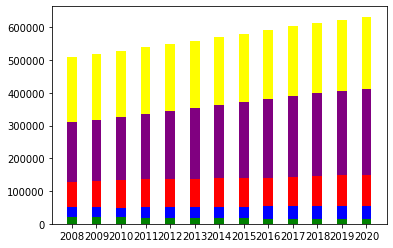

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=TOT%2CU%2CG%2CE%2CF&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1&OMR%C3%85DE=101', sep=';')

fraskilt = data.loc[data['CIVILSTAND']=='Fraskilt'].iloc[:, -1]
fraskilt

ugift = data.loc[data['CIVILSTAND']=='Ugift'].iloc[:, -1]
ugift

ialt = data.loc[data['CIVILSTAND']=='I alt'].iloc[:, -1]
ialt

giftsep = data.loc[data['CIVILSTAND']=='Gift/separeret'].iloc[:, -1]
giftsep

enke = data.loc[data['CIVILSTAND']=='Enke/enkemand'].iloc[:, -1]
enke

years = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

plt.bar(years, ialt, width=0.4, linewidth=0, align='center', color='yellow')#alle 
plt.bar(years, ugift, width=0.4, linewidth=0, align='center', color='purple')#ugift
plt.bar(years, giftsep, width=0.4, linewidth=0, align='center', color='red')#gift/separeret 
plt.bar(years, fraskilt, width=0.4, linewidth=0, align='center', color='blue')#fraskilt
plt.bar(years, enke, width=0.4, linewidth=0, align='center', color='green') #enke

#data[5:]

<BarContainer object of 13 artists>

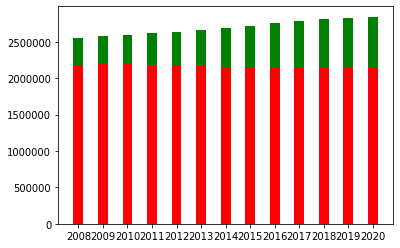

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1', sep=';')

ugift = data.loc[data['CIVILSTAND']=='Ugift'].iloc[:, -1]
ugift

giftsep = data.loc[data['CIVILSTAND']=='Gift/separeret'].iloc[:, -1]
giftsep

years = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

plt.bar(years, ugift, width=0.4, linewidth=0, align='center', color='green')#ugift
plt.bar(years, giftsep, width=0.4, linewidth=0, align='center', color='red')#gift/separeret 